In [1]:
import pandas as pd, numpy as np
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac/'); 
from my_tools import *
from plot_tools import *
%matplotlib inline

In [2]:
events = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/from_interactive/adi_prodgenie_bnb_nu_uboone_overlay_cosmic_data_100K_reco2_events.csv')
events_passed_SwT = events[events.passed_SwT==True]
print len(events),'events,',len(events_passed_SwT),'passed SwT (%.1f'%(float(100*len(events_passed_SwT))/len(events)),'%)'

10000 events, 8631 passed SwT (86.3 %)


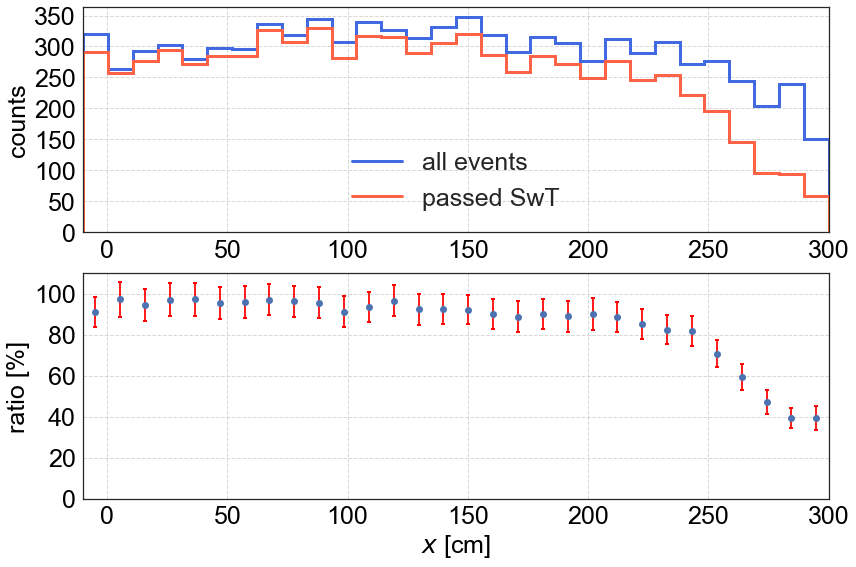

In [3]:
# direction,bins,x_label = 'E',np.linspace(-0.1,2,31),r'$E_\nu$ [GeV]'
direction,bins,x_label = 'x',np.linspace(-10,300,31),r'$x$ [cm]'
# direction,bins,x_label = 'y',np.linspace(-140,140,31),r'$y$ [cm]'
# direction,bins,x_label= 'z',np.linspace(-10,1100,31),r'$z$ [cm]'


h = dict()
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(2,1,1)
for sample,slabel,color in zip([events,events_passed_SwT]
                               ,['all events','passed SwT']
                               ,['royalblue','tomato']):
    h[slabel],bins,_=plt.hist(sample[direction+'(v-interaction)'],bins=bins,color=color,histtype='step',linewidth=3);
    plt.plot([0,0],[0,0],linewidth=3,label=slabel,color=color)
set_axes(ax,'','counts',do_add_legend=True,do_add_grid=True,xlim=(np.min(bins),np.max(bins)),legend_loc='lower center')
# ax.get_xaxis().set_major_formatter(NullFormatter())

ax = fig.add_subplot(2,1,2)
mid = 0.5*(bins[1:]+bins[:-1])
den = h['all events']
num = h['passed SwT']
h_ratio = [100.*num[i]/den[i] if den[i]>0 else 0 for i in range(len(den))]
h_ratio_err = h_ratio*np.sqrt([1./num[i]+1./den[i] if den[i]>0 and num[i]>0 else 0 for i in range(len(den))]) #np.sqrt(1./h['passed SwT']+1./h['all events'])
plt.errorbar(x=mid,xerr=0,y=h_ratio,yerr=h_ratio_err,fmt='o',capthick=2,capsize=2,ecolor='red')

set_axes(ax,x_label,'ratio [%]',do_add_grid=True,xlim=(np.min(bins),np.max(bins)),ylim=(0,110))


plt.tight_layout()

# What happens for a standard (default) GENIE sample?

In [10]:
events = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/from_interactive/prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev_events.csv')
events_passed_SwT = events[events.passed_SwT==True]
events_in_TPC = events[(( (events['x(v-interaction)']>0)&(events['x(v-interaction)']<256)
                       &(events['y(v-interaction)']>-116)&(events['y(v-interaction)']<116)
                       &(events['z(v-interaction)']>0)&(events['z(v-interaction)']<1037))==True)]
events_in_TPC_passed_SwT = events_in_TPC[events_in_TPC.passed_SwT==True]

events_outside_TPC = events[(( (events['x(v-interaction)']>0)&(events['x(v-interaction)']<256)
                       &(events['y(v-interaction)']>-116)&(events['y(v-interaction)']<116)
                       &(events['z(v-interaction)']>0)&(events['z(v-interaction)']<1037))==False)]

events_outside_TPC_passed_SwT = events_outside_TPC[events_outside_TPC.passed_SwT==True]



ratio = float(len(events_passed_SwT))/len(events)
ratio_err = ratio*sqrt(1./len(events_passed_SwT)+1./len(events))
print len(events),'events,',len(events_passed_SwT),'passed SwT (%.1f'%(100*ratio),'+/- %.1f'%(100*ratio_err),'%)'
ratio = float(len(events_in_TPC_passed_SwT))/len(events_in_TPC)
ratio_err = ratio*sqrt(1./len(events_in_TPC_passed_SwT)+1./len(events_in_TPC))
print len(events_in_TPC),'events in TPC,',len(events_in_TPC_passed_SwT),'passed SwT (%.1f'%(100*ratio),'+/- %.1f'%(100*ratio_err),'%)'
ratio = float(len(events_outside_TPC_passed_SwT))/len(events_outside_TPC)
ratio_err = ratio*sqrt(1./len(events_outside_TPC_passed_SwT)+1./len(events_outside_TPC))
print len(events_outside_TPC),'events in TPC,',len(events_outside_TPC_passed_SwT),'passed SwT (%.1f'%(100*ratio),'+/- %.1f'%(100*ratio_err),'%)'

5986 events, 5161 passed SwT (86.2 +/- 1.6 %)
2624 events in TPC, 2579 passed SwT (98.3 +/- 2.7 %)
3362 events in TPC, 2582 passed SwT (76.8 +/- 2.0 %)


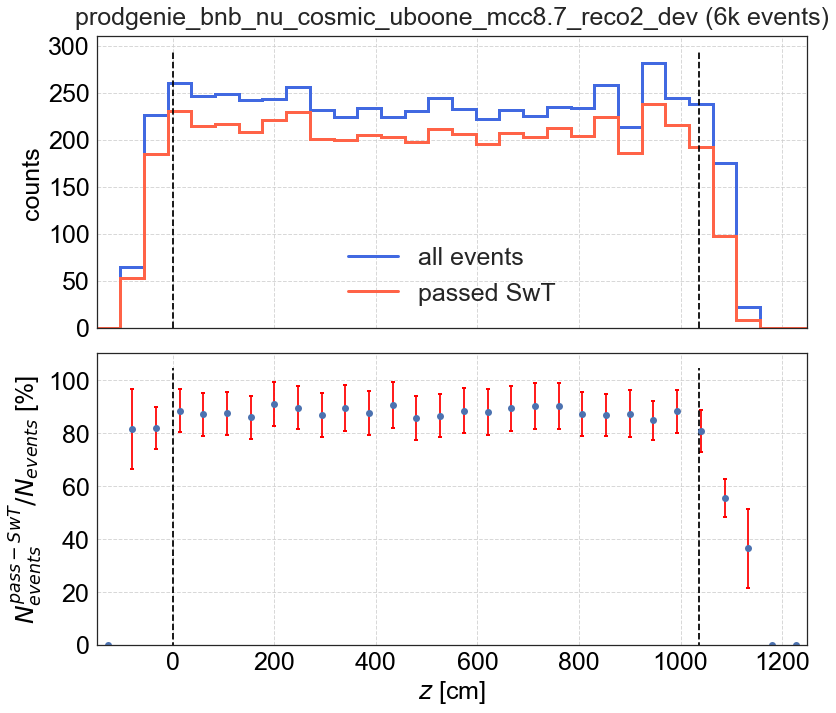

In [22]:
# direction,bins,x_label,TPClim = 'E',np.linspace(-0.1,2,31),r'$E_\nu$ [GeV]',(-0.1,2)
# direction,bins,x_label,TPClim = 'x',np.linspace(-80,330,31),r'$x$ [cm]',(0,256)
# direction,bins,x_label,TPClim = 'y',np.linspace(-201,201,31),r'$y$ [cm]',(-116,+116)
direction,bins,x_label,TPClim= 'z',np.linspace(-150,1250,31),r'$z$ [cm]',(0,1037)

events,events_passed_SwT

h = dict()
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(2,1,1)
for sample,slabel,color in zip([events,events_passed_SwT]
                               ,['all events','passed SwT']
                               ,['royalblue','tomato']):
    h[slabel],bins,_=plt.hist(sample[direction+'(v-interaction)'],bins=bins,color=color,histtype='step',linewidth=3);
    plt.plot([0,0],[0,0],linewidth=3,label=slabel,color=color)
set_axes(ax,'','counts',do_add_legend=True,remove_ticks_x=True,title='prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev (6k events)'
         ,do_add_grid=True,xlim=(np.min(bins),np.max(bins)),legend_loc='lower center')
plt.plot([TPClim,TPClim],ax.get_ylim(),'--',color='black')

ax = fig.add_subplot(2,1,2)
mid = 0.5*(bins[1:]+bins[:-1])
den = h['all events']
num = h['passed SwT']
h_ratio = [100.*num[i]/den[i] if den[i]>0 else 0 for i in range(len(den))]
h_ratio_err = h_ratio*np.sqrt([1./num[i]+1./den[i] if den[i]>0 and num[i]>0 else 0 for i in range(len(den))]) #np.sqrt(1./h['passed SwT']+1./h['all events'])
plt.errorbar(x=mid,xerr=0,y=h_ratio,yerr=h_ratio_err,fmt='o',capthick=2,capsize=2,ecolor='red')
plt.plot([TPClim,TPClim],ax.get_ylim(),'--',color='black')

set_axes(ax,x_label,r'$N_{events}^{pass-SwT}/N_{events}$ [%]',do_add_grid=True,xlim=(np.min(bins),np.max(bins)),ylim=(0,110))


plt.tight_layout()